# Probability Distribution Fuctions (PDF)

## Uniform distribution

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(2014)

In [2]:
a = 1
b = 100
n = 1000000
dataset = np.random.uniform(a,b,n)

(array([ 99615., 100015., 100379.,  99846., 100143.,  99926.,  99763.,
        100184., 100552.,  99577.]),
 array([ 1.00027983, 10.90024506, 20.80021029, 30.70017552, 40.60014074,
        50.50010597, 60.4000712 , 70.30003643, 80.20000166, 90.09996689,
        99.99993212]),
 <BarContainer object of 10 artists>)

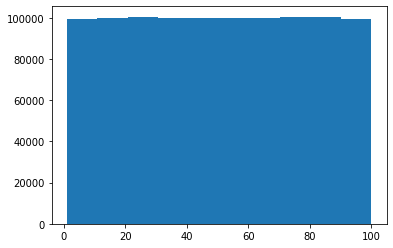

In [3]:
%matplotlib inline
plt.hist(dataset)

## Bell Curve

In [16]:
dataset_n = np.random.randn(10000)

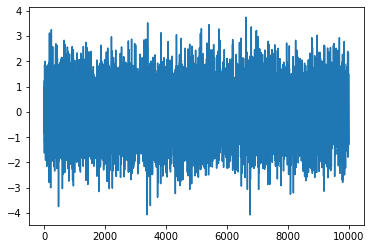

In [18]:
x = range (1,10001)
plt.plot(x,dataset_n)

(array([   5.,   60.,  347., 1263., 2585., 3034., 1859.,  698.,  133.,
          16.]),
 array([-4.07525873, -3.29297926, -2.51069978, -1.7284203 , -0.94614083,
        -0.16386135,  0.61841812,  1.4006976 ,  2.18297708,  2.96525655,
         3.74753603]),
 <BarContainer object of 10 artists>)

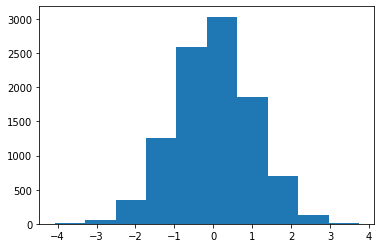

In [19]:
plt.hist(dataset_n)

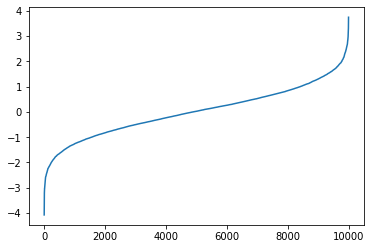

In [20]:
plt.plot(x,sorted(dataset_n))

(array([   9.,   86.,  480., 1396., 2397., 2772., 1927.,  730.,  177.,
          26.]),
 array([-3.95349839, -2.14018816, -0.32687792,  1.48643231,  3.29974254,
         5.11305277,  6.92636301,  8.73967324, 10.55298347, 12.36629371,
        14.17960394]),
 <BarContainer object of 10 artists>)

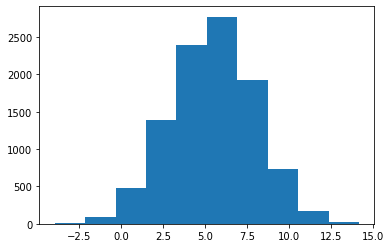

In [28]:
#mean
mu = 5.5
#standard deviation
sd =2.5
# recorriendo la campana
# Teorema central del límite, tipificar: convertir cualquier aletoria en una 
# normal estándar
# Z = (X-mu)/sd --> N(0,1)
# X = sd*Z + mu
z_1000 = np.random.randn(10000)
dataset_n = mu + sd*z_1000
plt.hist(dataset_n)

In [37]:
# x num de muestras aleatorias de y número de elementos
dataset_n = np.random.randn(2,4)
dataset_n


array([[-0.22620785,  1.22147563, -0.56121676,  0.58506919],
       [ 1.26156498, -1.12872423,  0.57724752,  1.03793154]])

## Simulación de Monte Carlo

2 random numbers entre (x y) 0 and 1 en total 1000 veces
* Calcular x^2 + y^2
    * si el valor es inferior a 1 ... dentro del círculo 
    * si el valor es superior a 1 ... fuera del círculo
* Calcular el num. total de veces dentro / num total de intentos 
para obtener la probabilidad de estar dentro del circulo
* Dicha probabilidad se usa para calcular le valor de PI
* Repetir experimento(ejemplo 100) para obtener varias (100) aprox de PI y se calcula
el promedio de repeticiones (100)

In [43]:
n = 10000
pi_avg = 0
pi_value_list = []
for i in range(100):
    value = 0
    x = np.random.uniform(0,1,n).tolist()
    y = np.random.uniform(0,1,n).tolist()
    for j in range(n):
        z = x[j]*x[j]+ y[j]*y[j]
        if z <=1:
            value +=1
    float_value = float(value)
    pi_value = float_value*4/n
    pi_value_list.append(pi_value)
    pi_avg += pi_value
pi = pi_avg/100

print(pi)   
            

3.1383719999999986


## Dummy Data Sets

In [52]:
n = 10000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5*np.random.randn(n),
        'C': np.random.uniform(5,32,n)
        
    }
)

In [53]:
data.describe()

,A,B,C
count,10000.000000,10000.000000,10000.000000
mean,-0.001771,1.461737,18.408653
std,0.992775,2.522964,7.846308
min,-4.288767,-7.119757,5.000076
25%,-0.661647,-0.268755,11.587572
50%,-0.007697,1.473598,18.416487
75%,0.672450,3.155298,25.200167
max,4.051708,10.653526,31.998773


(array([1060., 1003., 1014.,  983.,  969.,  989., 1024.,  952.,  992.,
        1014.]),
 array([ 5.00007632,  7.69994602, 10.39981571, 13.09968541, 15.79955511,
        18.49942481, 21.19929451, 23.8991642 , 26.5990339 , 29.2989036 ,
        31.9987733 ]),
 <BarContainer object of 10 artists>)

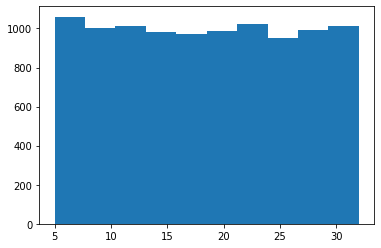

In [55]:
plt.hist(data["C"])

In [56]:
dataset = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [57]:
dataset.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [59]:
cols_names = dataset.columns.values.tolist()
cols_number = len(cols_names)

In [65]:
dataframe = pd.DataFrame(
    {
        'Column Name': cols_names,
        'A': np.random.randn(cols_number),
        'B': np.random.uniform(0,1,cols_number)    
    },index = range(42,42+cols_number)

)


In [66]:
dataframe

,Column Name,A,B
42,State,-0.754715,0.524630
43,Account Length,1.353044,0.281175
44,Area Code,1.933707,0.465075
45,Phone,-1.274564,0.757518
46,Int'l Plan,-0.700200,0.664023
47,VMail Plan,-0.353667,0.166098
48,VMail Message,-1.063156,0.034764
49,Day Mins,-1.249483,0.194645
50,Day Calls,-0.515156,0.053439
51,Day Charge,-0.027727,0.121291
